In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

/tmp/ipykernel_37574/363093523.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Fetching Data from Airtable

In [2]:
import requests

cookies = {
    'brwConsent': 'opt-in',
    'brw': 'brwubrsoswX9YCDVQ',
    '__Host-airtable-session': 'eyJzZXNzaW9uSWQiOiJzZXNrMmlGT1ByU0tUcGFIRCIsImNzcmZTZWNyZXQiOiJvZU9SaDlLZVpaVFJ4ODdRM1BJdVhERDgifQ==',
    '__Host-airtable-session.sig': 'cP4SH8lnEvW-WbZsdafLOtBF8qB4tRyqlUdpQjBbo7M',
    'mv': 'eyJsb2NhdGlvbiI6Imh0dHBzOi8vYWlydGFibGUuY29tL2FwcDFQYXVqUzl6eFZHVVo0L3NoclJFREFDVEVEMDAwMDAwL3RibDhjOGthbnVOQjZiUFlyP3ZpZXdDb250cm9scz0qIiwic3RhcnRUaW1lIjoiMjAyNC0wNy0xNlQxMDoxMToyOS43MjhaIiwiaW50ZXJuYWxUcmFjZUlkIjoidHJjVkVqdUhjWkhzVWpyeG8ifQ==',
    'OptanonConsent': 'isGpcEnabled=0&datestamp=Tue+Jul+16+2024+15%3A41%3A35+GMT%2B0530+(India+Standard+Time)&version=202308.2.0&browserGpcFlag=0&isIABGlobal=false&hosts=&consentId=1721c9e7-dcf4-4471-914a-026870885ef0&interactionCount=1&landingPath=https%3A%2F%2Fairtable.com%2Fapp1PaujS9zxVGUZ4%2FshrqYt5kSqMzHV9R5%2Ftbl8c8kanuNB6bPYr%3FviewControls%3Don&groups=C0001%3A1%2CC0002%3A1%2CC0007%3A1%2CC0003%3A1%2CC0004%3A1',
    'AWSALBTG': 'AlIh3dIjU/HkduTYtPSxBWDruU2elTeJgqeQpc9Wibj3xjd4Njh0hjhXq/CPyPivBqiZCUFFpxvQE/zxBORJwdXNW9InXYPTRKOGI3irSJTZYdCbU4TsdyJDpHeK8OoSzej+udfJTcDhnITCMRbRjZSWxAp0btHb7oSnuMoeeRswh+3ZFrs=',
    'AWSALBTGCORS': 'AlIh3dIjU/HkduTYtPSxBWDruU2elTeJgqeQpc9Wibj3xjd4Njh0hjhXq/CPyPivBqiZCUFFpxvQE/zxBORJwdXNW9InXYPTRKOGI3irSJTZYdCbU4TsdyJDpHeK8OoSzej+udfJTcDhnITCMRbRjZSWxAp0btHb7oSnuMoeeRswh+3ZFrs=',
    'AWSALB': 'lJJlgHJknP9vdTSNZBX3lt0nOol/y3lm1j8MLiC7WkZ+F/69QQnaWYd9IFwaGCcmgq9YFC7EHMXPUffEeXYeTcTg6FUbVqdC63FZON6sbcQMu7TqAG+oSZEB3OTm',
    'AWSALBCORS': 'lJJlgHJknP9vdTSNZBX3lt0nOol/y3lm1j8MLiC7WkZ+F/69QQnaWYd9IFwaGCcmgq9YFC7EHMXPUffEeXYeTcTg6FUbVqdC63FZON6sbcQMu7TqAG+oSZEB3OTm',
}

headers = {
    'authority': 'airtable.com',
    'accept': '*/*',
    'accept-language': 'en-US,en;q=0.9',
    # 'cookie': 'brwConsent=opt-in; brw=brwubrsoswX9YCDVQ; __Host-airtable-session=eyJzZXNzaW9uSWQiOiJzZXNrMmlGT1ByU0tUcGFIRCIsImNzcmZTZWNyZXQiOiJvZU9SaDlLZVpaVFJ4ODdRM1BJdVhERDgifQ==; __Host-airtable-session.sig=cP4SH8lnEvW-WbZsdafLOtBF8qB4tRyqlUdpQjBbo7M; mv=eyJsb2NhdGlvbiI6Imh0dHBzOi8vYWlydGFibGUuY29tL2FwcDFQYXVqUzl6eFZHVVo0L3NoclJFREFDVEVEMDAwMDAwL3RibDhjOGthbnVOQjZiUFlyP3ZpZXdDb250cm9scz0qIiwic3RhcnRUaW1lIjoiMjAyNC0wNy0xNlQxMDoxMToyOS43MjhaIiwiaW50ZXJuYWxUcmFjZUlkIjoidHJjVkVqdUhjWkhzVWpyeG8ifQ==; OptanonConsent=isGpcEnabled=0&datestamp=Tue+Jul+16+2024+15%3A41%3A35+GMT%2B0530+(India+Standard+Time)&version=202308.2.0&browserGpcFlag=0&isIABGlobal=false&hosts=&consentId=1721c9e7-dcf4-4471-914a-026870885ef0&interactionCount=1&landingPath=https%3A%2F%2Fairtable.com%2Fapp1PaujS9zxVGUZ4%2FshrqYt5kSqMzHV9R5%2Ftbl8c8kanuNB6bPYr%3FviewControls%3Don&groups=C0001%3A1%2CC0002%3A1%2CC0007%3A1%2CC0003%3A1%2CC0004%3A1; AWSALBTG=AlIh3dIjU/HkduTYtPSxBWDruU2elTeJgqeQpc9Wibj3xjd4Njh0hjhXq/CPyPivBqiZCUFFpxvQE/zxBORJwdXNW9InXYPTRKOGI3irSJTZYdCbU4TsdyJDpHeK8OoSzej+udfJTcDhnITCMRbRjZSWxAp0btHb7oSnuMoeeRswh+3ZFrs=; AWSALBTGCORS=AlIh3dIjU/HkduTYtPSxBWDruU2elTeJgqeQpc9Wibj3xjd4Njh0hjhXq/CPyPivBqiZCUFFpxvQE/zxBORJwdXNW9InXYPTRKOGI3irSJTZYdCbU4TsdyJDpHeK8OoSzej+udfJTcDhnITCMRbRjZSWxAp0btHb7oSnuMoeeRswh+3ZFrs=; AWSALB=lJJlgHJknP9vdTSNZBX3lt0nOol/y3lm1j8MLiC7WkZ+F/69QQnaWYd9IFwaGCcmgq9YFC7EHMXPUffEeXYeTcTg6FUbVqdC63FZON6sbcQMu7TqAG+oSZEB3OTm; AWSALBCORS=lJJlgHJknP9vdTSNZBX3lt0nOol/y3lm1j8MLiC7WkZ+F/69QQnaWYd9IFwaGCcmgq9YFC7EHMXPUffEeXYeTcTg6FUbVqdC63FZON6sbcQMu7TqAG+oSZEB3OTm',
    'sec-ch-ua': '"Not A(Brand";v="99", "Google Chrome";v="121", "Chromium";v="121"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Linux"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-origin',
    'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36',
    'x-airtable-accept-msgpack': 'true',
    'x-airtable-application-id': 'app1PaujS9zxVGUZ4',
    'x-airtable-inter-service-client': 'webClient',
    'x-airtable-page-load-id': 'pglEJLzQ6JFtGSr5W',
    'x-early-prefetch': 'true',
    'x-requested-with': 'XMLHttpRequest',
    'x-time-zone': 'Asia/Calcutta',
    'x-user-locale': 'en',
}

response = requests.get(
    'https://airtable.com/v0.3/view/viwA14Z1pM69YIsaW/readSharedViewData?stringifiedObjectParams=%7B%22shouldUseNestedResponseFormat%22%3Atrue%7D&requestId=reqqyp00QNZgp837j&accessPolicy=%7B%22allowedActions%22%3A%5B%7B%22modelClassName%22%3A%22view%22%2C%22modelIdSelector%22%3A%22viwA14Z1pM69YIsaW%22%2C%22action%22%3A%22readSharedViewData%22%7D%2C%7B%22modelClassName%22%3A%22view%22%2C%22modelIdSelector%22%3A%22viwA14Z1pM69YIsaW%22%2C%22action%22%3A%22getMetadataForPrinting%22%7D%2C%7B%22modelClassName%22%3A%22view%22%2C%22modelIdSelector%22%3A%22viwA14Z1pM69YIsaW%22%2C%22action%22%3A%22readSignedAttachmentUrls%22%7D%2C%7B%22modelClassName%22%3A%22row%22%2C%22modelIdSelector%22%3A%22rows%20*%5BdisplayedInView%3DviwA14Z1pM69YIsaW%5D%22%2C%22action%22%3A%22createDocumentPreviewSession%22%7D%5D%2C%22shareId%22%3A%22shrqYt5kSqMzHV9R5%22%2C%22applicationId%22%3A%22app1PaujS9zxVGUZ4%22%2C%22generationNumber%22%3A0%2C%22expires%22%3A%222024-08-01T00%3A00%3A00.000Z%22%2C%22signature%22%3A%22f2fdeadf0b5b1e09e1f73e776fc85e4a63916bd40e9ccb3526e2e52957eb6ee2%22%7D',
    cookies=cookies,
    headers=headers,
)

In [3]:
jsonData = response.json()

In [4]:
table = jsonData.get("data","").get("table")

In [5]:
columns = table.get("columns","")

In [6]:
mappingDict = dict()
for column in columns:
    id = column["id"]
    name = column["name"]
    mappingDict[id] = name
    if "typeOptions" in column:
        try:
            typeOptions = column.get("typeOptions")
            choices = typeOptions.get("choices")
            for key,value in choices.items():
                mappingDict[value["id"]] = value["name"]
        except:
            pass

In [7]:
rows= table.get("rows","")

Analysing Data Available in json response and identifying values of it like country from countrycode etc

In [8]:
dataLst =[]
for row in rows:
    cellValuesByColumnId = row["cellValuesByColumnId"]
    interdict = dict()
    for d,k in cellValuesByColumnId.items():
        interdict[mappingDict[d]] = k
    dataLst.append(interdict)

Creating DataFrame

In [9]:
df = pd.DataFrame(dataLst)

In [10]:
df.head()

,Company,Location HQ,Industry,# Laid Off,Date,Source,$ Raised (mm),Stage,Date Added,Country,%,List of Employees Laid Off
0,Salesforce,[selKhBn9WkXIaFjXW],selgmaGYdzpDjso0S,300.0,2024-07-15T00:00:00.000Z,https://www.bloomberg.com/news/articles/2024-0...,65.0,sela5OuwQcXOkl5WO,2024-07-15T18:40:46.000Z,seldVNXmT64IJdbP2,NaN,NaN
1,Intuit,[selKhBn9WkXIaFjXW],seluHafT4M09jrLuo,1800.0,2024-07-10T00:00:00.000Z,https://www.bloomberg.com/news/articles/2024-0...,18.0,sela5OuwQcXOkl5WO,2024-07-10T14:17:27.000Z,seldVNXmT64IJdbP2,0.10,NaN
2,CyberProof,[sel4xFmzIJcPrnGBs],selOiyle68RTVF1rX,NaN,2024-07-10T00:00:00.000Z,https://www.calcalistech.com/ctechnews/article...,NaN,selwHTygmCHsMHTWb,2024-07-11T01:21:00.000Z,seldVNXmT64IJdbP2,0.07,NaN
3,UIPath,[selaY0t9IlOz71lPt],selFbYcvIJ3UEiwsU,420.0,2024-07-09T00:00:00.000Z,https://www.cnbc.com/2024/07/09/uipath-layoffs...,2000.0,sela5OuwQcXOkl5WO,2024-07-10T04:45:16.000Z,seldVNXmT64IJdbP2,0.10,NaN
4,UKG,[sel6A2z5gDHYTOlhn],selZq6RloLnGETcqq,2200.0,2024-07-03T00:00:00.000Z,https://www.bizjournals.com/boston/news/2024/0...,NaN,selRkNOUKADWhjDVg,2024-07-03T17:29:01.000Z,seldVNXmT64IJdbP2,0.14,NaN


In [11]:
def identifyValues(text):
    try:
        if isinstance(text,list):
            return list(map(lambda x:mappingDict[x],text))
        else:
            return mappingDict[text]
    except:
        return ''

In [12]:
df.columns

Index(['Company', 'Location HQ', 'Industry', '# Laid Off', 'Date', 'Source',
       '$ Raised (mm)', 'Stage', 'Date Added', 'Country', '%',
       'List of Employees Laid Off'],
      dtype='object')

In [13]:
df.shape  #Number of Layoffs happened till today

(3698, 12)

In [14]:
df["Industry"] = df["Industry"].apply(identifyValues)

In [15]:
df["Stage"] = df["Stage"].apply(identifyValues)

In [16]:
df["Country"] = df["Country"].apply(identifyValues)

In [17]:
df["Location HQ"] = df["Location HQ"].apply(identifyValues)

In [18]:
df.head()

,Company,Location HQ,Industry,# Laid Off,Date,Source,$ Raised (mm),Stage,Date Added,Country,%,List of Employees Laid Off
0,Salesforce,[SF Bay Area],Sales,300.0,2024-07-15T00:00:00.000Z,https://www.bloomberg.com/news/articles/2024-0...,65.0,Post-IPO,2024-07-15T18:40:46.000Z,United States,NaN,NaN
1,Intuit,[SF Bay Area],Finance,1800.0,2024-07-10T00:00:00.000Z,https://www.bloomberg.com/news/articles/2024-0...,18.0,Post-IPO,2024-07-10T14:17:27.000Z,United States,0.10,NaN
2,CyberProof,[Los Angeles],Security,NaN,2024-07-10T00:00:00.000Z,https://www.calcalistech.com/ctechnews/article...,NaN,Subsidiary,2024-07-11T01:21:00.000Z,United States,0.07,NaN
3,UIPath,[New York City],Other,420.0,2024-07-09T00:00:00.000Z,https://www.cnbc.com/2024/07/09/uipath-layoffs...,2000.0,Post-IPO,2024-07-10T04:45:16.000Z,United States,0.10,NaN
4,UKG,[Boston],HR,2200.0,2024-07-03T00:00:00.000Z,https://www.bizjournals.com/boston/news/2024/0...,NaN,Unknown,2024-07-03T17:29:01.000Z,United States,0.14,NaN


Layoffs W.r.t Funding Stages

<Axes: xlabel='Stage'>

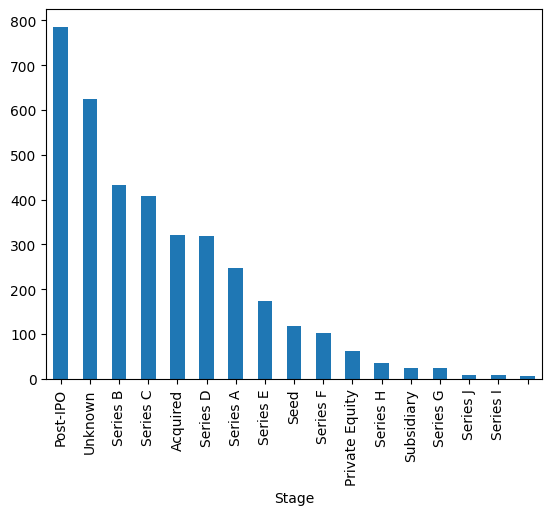

In [19]:
df["Stage"].value_counts().plot(kind="bar") 

In [20]:
def get_year(datestring):
    try:
        datestring = datestring.split("T")[0]
        dt = datetime.strptime(datestring, '%Y-%m-%d')

        return dt.year
    except:
        return 0

In [21]:
df["Year"] = df["Date"].apply(get_year)

In [22]:
def get_month(datestring):
    try:
        datestring = datestring.split("T")[0]
        dt = datetime.strptime(datestring, '%Y-%m-%d')

        return dt.month
    except:
        return 0

In [23]:
df["Month"] = df["Date"].apply(get_year)

Number of Layoffs Rounds Each year

<Axes: xlabel='Year'>

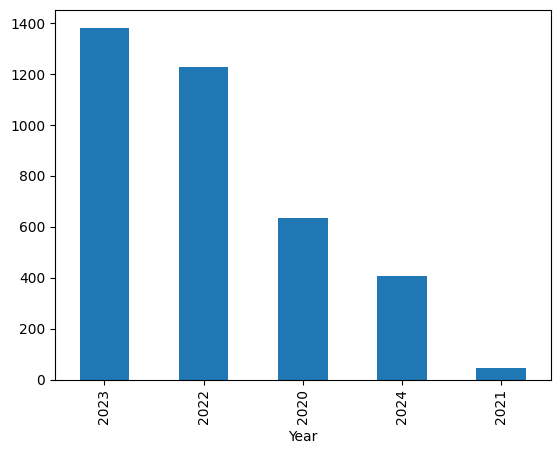

In [24]:
df["Year"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

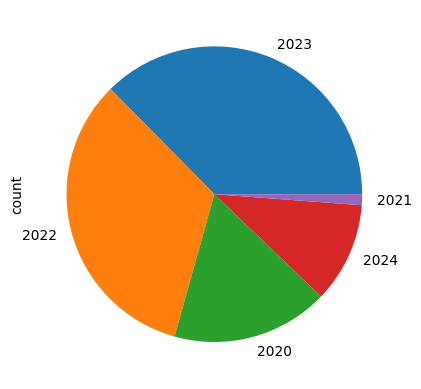

In [25]:
df["Year"].value_counts().plot(kind="pie")

Number of Peoples laid off each year

<Axes: xlabel='Year'>

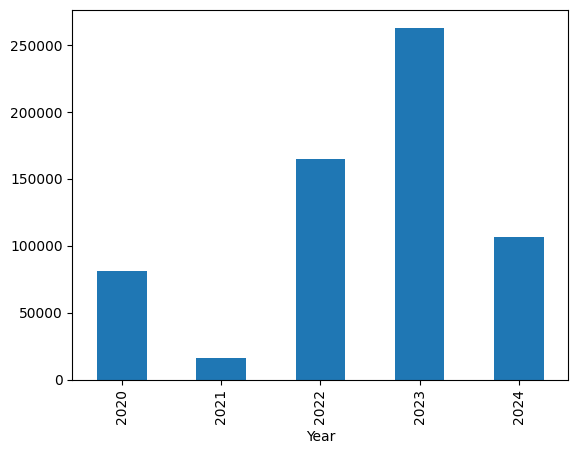

In [26]:
df.groupby(["Year"])["# Laid Off"].sum().plot(kind="bar")

Analysing Number of Layoffs Rounds W.R.T. Industry

<Axes: xlabel='Industry'>

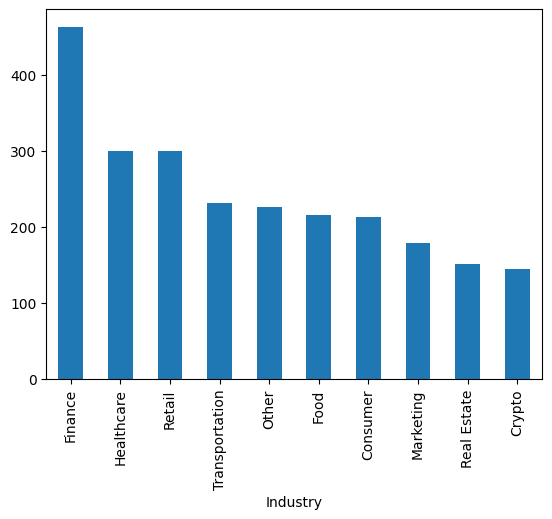

In [31]:
df["Industry"].value_counts()[:10].plot(kind="bar")

Number of Peoples Laid off Industry wise

<Axes: xlabel='Industry'>

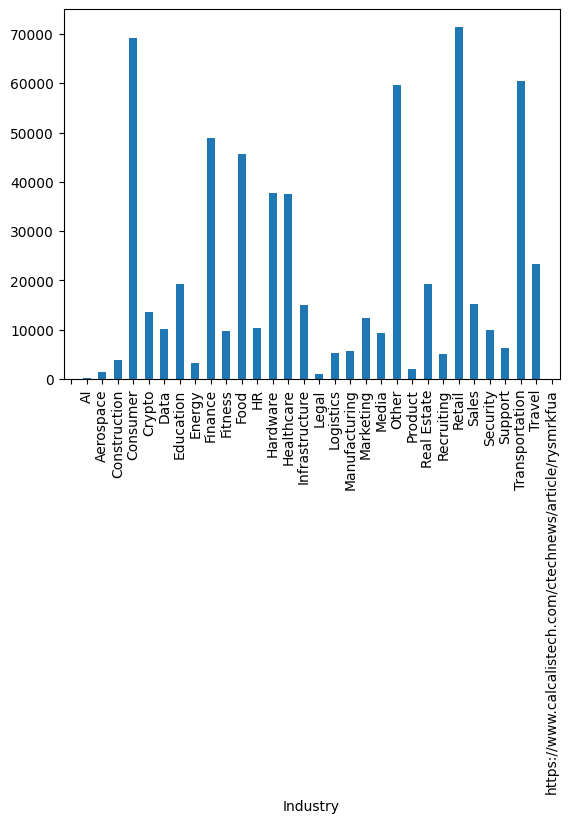

In [32]:
df.groupby(["Industry"])["# Laid Off"].sum().plot(kind="bar")

Number of Layoffs Rounds Country wise

<Axes: xlabel='Country'>

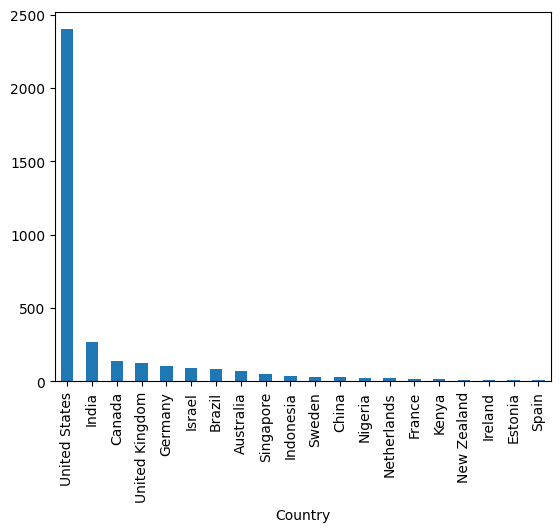

In [33]:
df["Country"].value_counts()[:20].plot(kind="bar")

<Axes: xlabel='Country'>

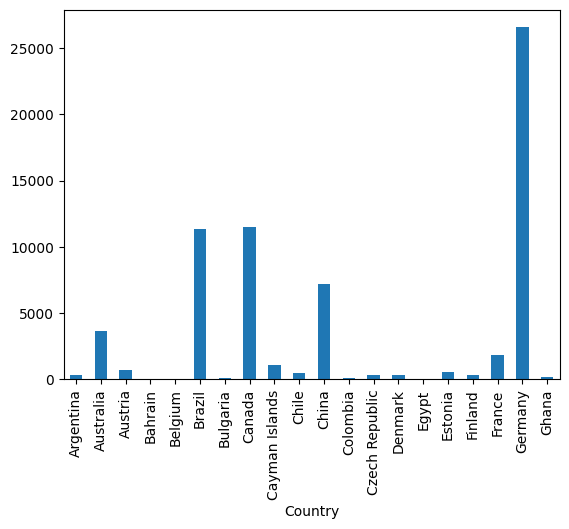

In [34]:
df.groupby(["Country"])["# Laid Off"].sum()[:20].plot(kind="bar")